# Lecture 14

### Decisions and Uncertainty

## Incomplete Information

* We try to choose between two views of the world, based on data in a sample.
* It's not always clear whether the data are consistent with one view or the other (unlike examples last time).
* Random samples can turn out quite extreme. It is unlikely, but possible.


## Testing Hypotheses
* A test chooses between two views of how data were generated
* The views are called **hypotheses**
* The test picks the hypothesis that is better supported by the observed data


## Null and Alternative
* The method only works if we can simulate data under one of the hypotheses.
* **Null hypothesis**
    - A well defined chance model about how the data were generated
    - We can simulate data under the assumptions of this model – “under the null hypothesis”
* **Alternative hypothesis**
    - A different view about the origin of the data

## Conclusion of the Test
Resolve choice between null and alternative hypotheses
* Compare the **observed test statistic** and its empirical distribution under the null hypothesis
* If the observed value is **not consistent** with the distribution, then the test favors the alternative – “rejects the null hypothesis”

Whether a value is consistent with a distribution:
* A visualization may be sufficient
* If not, there are conventions about “consistency”


## Performing a Test

## Test Statistic
* The statistic that we choose to simulate, to decide between the two hypotheses

Questions before choosing the statistic:
* What values of the statistic will make us lean towards the null hypothesis?
* What values will make us lean towards the alternative?
    - Preferably, the answer should be just “high”. Try to avoid “both high and low”.


## Prediction Under the Null Hypothesis
* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It is a prediction about the statistic, made by the null hypothesis 
    - It shows all the likely values of the statistic
    - Also how likely they are (if the null hypothesis is true)
* The probabilities are approximate, because we can’t generate all the possible random samples


# Example Time!

### The Problem

* Large Statistics class divided into 12 discussion sections
* TAs lead the sections

* After the midterm, students in Section 3 notice that the average score in their section is lower than in others.




### The TA's Defense

GSI’s position (Null Hypothesis):
* If we had picked my section at random from the whole class, we could have got an average like this one.

Alternative:
* No, the average score is too low. Randomness is not the only reason for the low scores.


In [1]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

In [2]:
#:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
# Calculate the average midterm score per section
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


### What are the observed characteristics of section 3?
* Size of section? (`section_size`)
* Average of section? (`observed_avg`)

In [5]:
#:
section_size = scores.group('Section').where('Section', 3).column('count').item(0)
observed_avg = scores.group('Section', np.average).where('Section', 3).column('Midterm average').item(0)
print(section_size, observed_avg, sep='\n')

27
13.666666666666666


### Testing the null hypothesis
* Model: Sample uniformly (w/o replacement) 27 students from the class.
* Statistic: Calculate the average midterm score of "random" section.


In [6]:
#:
averages = make_array()

for i in np.arange(50000):
    random_sample = scores.sample(section_size, with_replacement = False)
    new_average = np.average(random_sample.column('Midterm'))
    averages = np.append(averages, new_average)

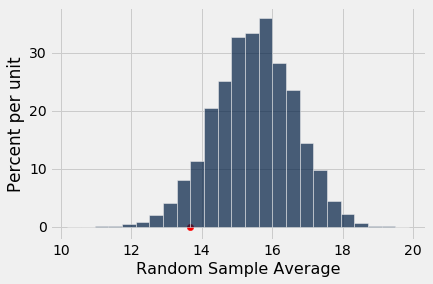

In [7]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plt.scatter(observed_avg, 0, color = 'red', s=40);

## The Verdict?
* Not as obvious as previous examples!
* Need a concept to capture the uncertainty of the conclusion.

### Question
* What is the probability that under the Null Hypothesis, a result *at least* as extreme as our observation holds?
* This quantity is called a **p-value**

In [8]:
#:
np.count_nonzero(averages <= observed_avg) / 50000

0.05958

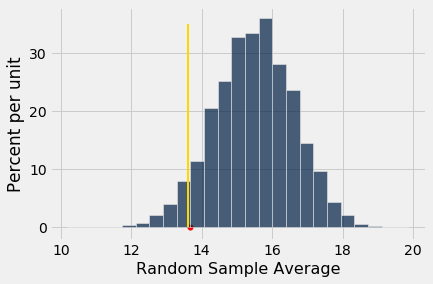

In [9]:
#:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plt.scatter(observed_avg, 0, color='red', s=30)
plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);

# Statistical Significance

## Conventions About Inconsistency

* **“Inconsistent”**: The test statistic is in the tail of the empirical distribution under the null hypothesis

* **“In the tail,” first convention**:
    - The area in the tail is less than 5%
    - The result is “statistically significant”

* **“In the tail,” second convention**:
    - The area in the tail is less than 1%
    - The result is “highly statistically significant”


## Definition of the P-value

Formal name: **observed significance level**

The P-value is the chance, under the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

## An Error Probability

The cutoff for the P-value is an error probability.

* If:
    - your cutoff is 5%
    - and the null hypothesis happens to be true

* then there is about a 5% chance that your test will reject the null hypothesis.


# A/B Testing

- So far, we've been assessing models given a single random sample.
    - We flip a coin 400 times. Are the flips consistent with the coin being fair?
    - Did the jury panel in the Swain case look like a random sample from the eligible population?
    - Are the test scores for the GSI's section a random sample from the class's scores?
- But we often have *two* random samples we wish to compare.
    - Outcomes of patients assigned to control group and treatment group in a pharmaceutical study.
    - Number of clicks from people who saw version A of an advertisement vs. version B
- **A/B testing**: decide whether two random samples come from the same distribution.
- The "exciting" outcome is typically that which *rejects* the null hypothesis.

# Example 1: Birth Weight and Smoking

## Smoking and birth weight

- Is there a significant difference in the weight of babies born to mothers who smoke, vs. non-smokers?
- Two groups:
    - babies whose mothers smoke
    - babies whose mothers do not smoke

In [10]:
#: our data
baby = Table.read_table('babby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [11]:
#: we only need "Birth Weight" and "Maternal Smoker"
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


## First, some exploratory analysis

In [12]:
# how many are in each group?
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [13]:
# what is the average weight within each group?
smoking_and_birthweight.group('Maternal Smoker', np.mean)

Maternal Smoker,Birth Weight mean
False,123.085
True,113.819


## Visualizing the distribution of each group

- `.hist()` has a `group` keyword argument.

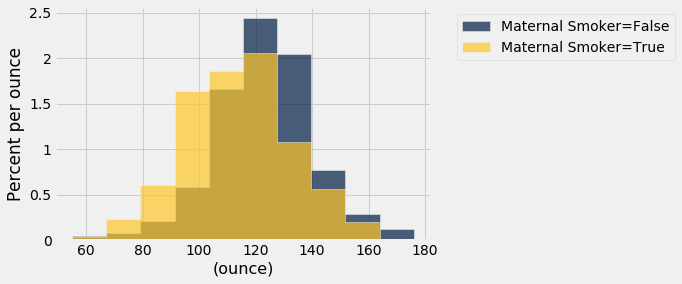

In [14]:
# visualize distribution of 'Birth Weight', grouped by 'Maternal Smoker'
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker', unit='ounce')

## The question...

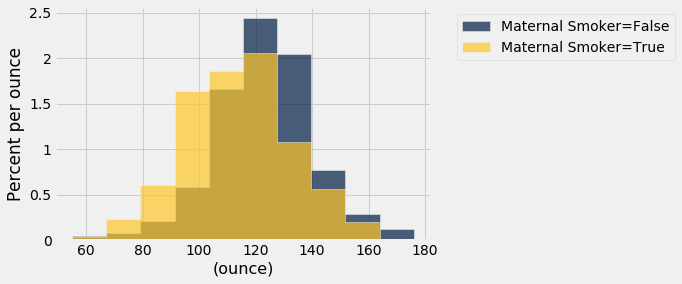

In [15]:
#::
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker', unit='ounce')

- Does the difference we see reflect a real difference in the population?
- Or is it just due to random chance?

## Testing the hypotheses

- **Null hypothesis**: In the population, birth weights of smokers and non-smokers have the same distribution.
    - I.e., what we saw is due to random chance.
- **Alternative hypothesis**: In the population, babies born to smokers typically have lower birth weight.

## Discussion question

- What is a reasonable statistic to compute in order to test the null hypothesis?

## Answer: difference between means

In [16]:
#:: the means
means_table = smoking_and_birthweight.group('Maternal Smoker', np.mean)
means_table

Maternal Smoker,Birth Weight mean
False,123.085
True,113.819


In [17]:
#: difference between them
means = means_table.column('Birth Weight mean')
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

## Testing through simulation

- **Statistic**: Difference between means.
- **Null hypothesis**: The two groups are sampled from the same distribution.
- Note that the null hypothesis doesn't say *what* the distribution is.
    - Different from jury panel example, fair coin example, etc.
    - We can't draw directly from the distribution!
- We have to do something a bit more clever.

## Implications of the null hypothesis

- Under the null hypothesis, both groups are sampled from the same distribution.
- If true, then the group label (`Maternal Smoker`) has no effect on the birth weight.
- We saw one assignment of group labels:

In [18]:
#:: the data
smoking_and_birthweight.show(4)

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108


- But (under the null hypothesis) we were just as likely to see *any other* assignment.

## Permutation tests

- Perhaps the difference in means we saw is due to random chance in assignment.
- **Permutation test**: Shuffle the group labels a bunch of times; how often do we see a statistic this extreme?
- Randomly permuting labels is equivalent to randomly assigning birth weights to groups (without changing group sizes)
- If we *rarely* see something this extreme, then the null hypothesis doesn't look likely.

## Permutation tests with tables

- We want to randomly shuffle the `Maternal Smoker` column.
- We can use `.sample(with_replacement=False)`.
- By default, draws as many times as there are rows (i.e., shuffles)

In [19]:
#: starting with this data...
data = Table(['x', 'y']).with_rows([['a', 1], ['b', 2], ['c', 3]])
data

x,y
a,1
b,2
c,3


In [20]:
#: we shuffle the rows using `.sample()`
data.sample(with_replacement=False)

x,y
a,1
c,3
b,2


- Notice: Both rows are shuffled together (i.e., not independently)!

## Discussion Question

In the birthweight example, we want to shuffle only one column. For the purpose of permutation testing, 
does it matter which column we shuffle -- the `Maternal Smoker` column or the `Birth Weight` column?

- A) Yes
- B) No

## Shuffling the groups

In [21]:
#: it doesn't matter which column we shuffle, but it will be more convenient to shuffle weights
shuffled_weights = smoking_and_birthweight.sample(with_replacement=False).column('Birth Weight')
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Birth Weight', shuffled_weights)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,86
False,113,118
True,128,87
True,108,72
False,136,155
False,138,124
False,132,116
False,120,138
True,143,124
False,140,99


## How close are the means of the shuffled groups?

In [22]:
#: shuffling the weights makes it easier to do this...
original_and_shuffled.group('Maternal Smoker', np.mean)

Maternal Smoker,Birth Weight mean,Shuffled Birth Weight mean
False,123.085,119.699
True,113.819,119.094


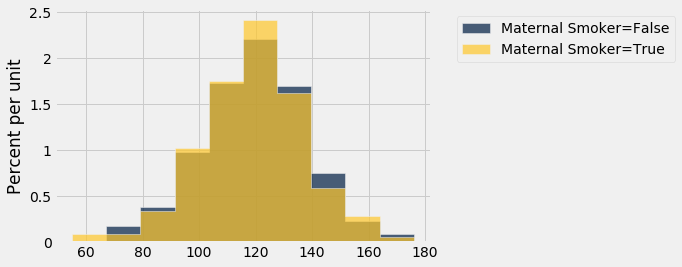

In [23]:
#: the distribution of the shuffled groups
original_and_shuffled.hist('Shuffled Birth Weight', group='Maternal Smoker')

## Simulation

- This was just one random shuffle.
- How likely is it that a random shuffle results in a 9+ ounce difference in means?
- We have to repeat the shuffling a bunch of times. On each iteration:
    1. Shuffle the weights.
    2. Put them in a table.
    3. Compute difference in group means.

In [24]:
n_repetitions = 500

differences = make_array()
for i in np.arange(n_repetitions):
    # shuffle the weights
    shuffled_weights = (
        smoking_and_birthweight
        .sample(with_replacement=False)
        .column('Birth Weight')
    )
    
    # put them in a table
    shuffled = smoking_and_birthweight.with_column(
        'Shuffled Birth Weights', 
        shuffled_weights
    )
    
    # compute the group differences
    group_means = (
        shuffled
        .group('Maternal Smoker', np.mean)
        .column('Shuffled Birth Weights mean')
    )
    difference = group_means.item(1) - group_means.item(0)
    
    # add it to our array storing the results
    differences = np.append(differences, difference)

## Conclusion of the test

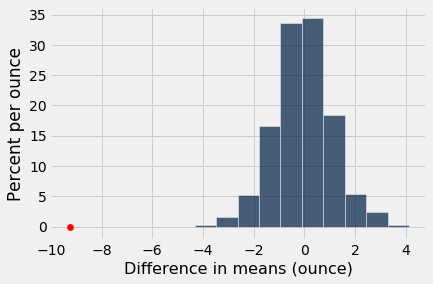

In [25]:
#: visualize
Table().with_columns('Difference in means', differences).hist(unit='ounce')
plt.scatter(observed_difference, 0, color='red', s=40)

- Under the null hypothesis, we rarely see differences as large as this.
- Therefore, we reject the null hypothesis: the two groups do not come from the same distribution.

## Caution!

- We **cannot** conclude that smoking *causes* lower birth weight!
- This was an observational study; there may be confounding factors.
    - Maybe smokers are more likely to drink caffeine, and caffeine causes lower birth weight.
- But it suggests that it is worth studying with a randomized controlled trial.

## A slightly different example

- Is there a difference in birthweight between babies born to:
    - Group A: Mothers over 25
    - Group B: Mothers 25 or under

In [26]:
#: construct the data set
over_25 = baby.column('Maternal Age') > 25
age_and_birthweight = (
    baby
    .select('Birth Weight')
    .with_column('Over 25', over_25)
)
age_and_birthweight

Birth Weight,Over 25
120,True
113,True
128,True
108,False
136,False
138,True
132,False
120,False
143,True
140,True


In [27]:
#: the group means
group_means = age_and_birthweight.group('Over 25', np.mean)
group_means

Over 25,Birth Weight mean
False,118.495
True,120.229


In [28]:
#: the difference between them
means = group_means.column('Birth Weight mean')
observed_difference = means.item(0) - means.item(1)
observed_difference

-1.7338245892717907

## The permutation test

- **Null hypothesis**: Birth weights for both groups come from the same distribution.
- **Alternative hypothesis**: No, mothers below 25 have heavier babies.
- We run a permutation test with the difference in means as the statistic.

## Simulation

In [29]:
#: similar code to before

np.random.seed(424242)
n_repetitions = 500

differences = make_array()
for i in np.arange(n_repetitions):
    # shuffle the weights
    shuffled_weights = (
        age_and_birthweight
        .sample(with_replacement=False)
        .column('Birth Weight')
    )
    
    # put them in a table
    shuffled = age_and_birthweight.with_column(
        'Shuffled Birth Weights', 
        shuffled_weights
    )
    
    # compute the group differences
    group_means = (
        shuffled
        .group('Over 25', np.mean)
        .column('Shuffled Birth Weights mean')
    )
    difference = group_means.item(1) - group_means.item(0)
    
    # add it to our array storing results
    differences = np.append(differences, difference)

## Conclusion of the test

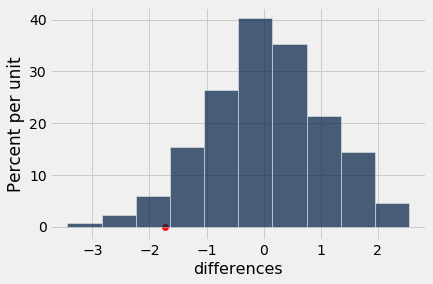

In [30]:
#: visualize
Table().with_column('differences', differences).hist()
plt.scatter(observed_difference, 0, color='red', s=40)

- Do we reject the null hypothesis?
- What can we compute to tell us the degree of uncertainty here?

## The p-value

- The probability of seeing a difference of means $\leq$ the observed, under the null hypothesis.

In [31]:
np.count_nonzero(differences <= observed_difference) / n_repetitions

0.042

# Example 2: Deflategate

## Did the New England Patriots cheat?

<img height="30%" src="./deflate.jpg">

- On January 18, 2015, the Patriots played the Indianapolis Colts for a spot in the Super Bowl
- The Patriots won, 45 -- 7. They went on to win the Super Bowl
- After the game, it was alleged that the Patriots intentionally deflated footballs (making them easier to catch)

## Background

- Each team brings 12 footballs to the game.
- NFL rules stipulate: each ball must be inflated to between 12.5 and 13.5 pounds per square inch (psi).
- Before the game, officials found that all of the Patriot's balls were at about 12.5 psi, all of the Colts were about 13.0 psi.
- In the second quarter, Colts intercepted a Patriots ball and notified officials that it felt under-inflated.
- At halftime, two officials (Blakeman and Prioleau) each measured the pressure again.
- They ran out of time, and couldn't measure the pressure of all of the footballs.

## The measurements

In [ ]:
#: all of the measurements
footballs = Table.read_table('./deflategate.csv')
footballs.show()

## Combining the measurements

- Both officials measured each ball.
- Their measurements are slightly different.
- We average them to get a combined weight.

In [ ]:
#: a combined measurement
footballs = footballs.with_column(
    'Combined',
    (footballs.column('Blakeman') + footballs.column('Prioleau')) / 2
)
footballs.show()

## Differences in average pressure

- At first glance, it looks as though the Patriots footballs are at a lower pressure.

In [ ]:
#:: group means
footballs.group('Team', np.mean)

- We could do a permutation test for difference in mean pressure.
- But that wouldn't point towards cheating.
    - The Patriot's balls *started* at a lower psi.
- The allegations were that the Patriots *deflated* the balls.
    - We want to check to see if the Patriots balls lost more pressure than the Colts'.

## Calculating the pressure drop

- We therefore calculate the drop in pressure for each ball.
- Patriots' started at 12.5 psi, Colts' started at 13.
- We make an array with starting pressure for each ball.
- Handy function: `np.where(array_of_true_and_false, true_value, false_value)`.
    - Replaces `True` in the array with `true_value`, and `False` with `false_value`.

In [ ]:
#...starting_pressure
starting_pressure = np.where(
    footballs.column('Team') == 'Patriots',
    12.5,
    13
)
starting_pressure

## Calculating the pressure drop

In [ ]:
#: add the drop to the table
footballs = footballs.with_column(
    'Pressure Drop',
    starting_pressure - footballs.column('Combined')
)
footballs.show()

## The question

- Did the Patriots' footballs drop in pressure more than the Colts'?
- A/B test!
- **Null hypothesis**: The drop in pressures for both teams came from the same distribution.
    - By chance, the Patriots' footballs deflated more.
- **Alternative hypothesis**: No, the Patriots' footballs deflated more than one would expect due to random chance alone.

## The statistic

- Difference between teams' average pressure drops.

In [ ]:
#: the group means
means = footballs.group('Team', np.mean).select('Team', 'Pressure Drop mean')
means

In [ ]:
#: the observed difference
mean_drop = means.column('Pressure Drop mean')
observed_difference = mean_drop.item(1) - mean_drop.item(0)
observed_difference

- The average pressure drop for the Patriots was 0.73 psi more than the Colts.

## Permutation test

- We run a permutation test to see if this is a significant difference.
- Permute the drop in pressure (or the team column), many times.

In [ ]:
#: run a permutation test
n_repetitions = 5000

differences = make_array()
for i in np.arange(n_repetitions):
    # shuffle the weights
    shuffled_drops = (
        footballs
        .sample(with_replacement=False)
        .column('Pressure Drop')
    )
    
    # put them in a table
    shuffled = footballs.with_column(
        'Shuffled Pressure Drop', 
        shuffled_drops
    )
    
    # compute the group differences
    group_means = (
        shuffled
        .group('Team', np.mean)
        .column('Shuffled Pressure Drop mean')
    )
    difference = group_means.item(1) - group_means.item(0)
    
    # add it to our array storing results
    differences = np.append(differences, difference)

## Conclusion

In [ ]:
#:: visualize
Table().with_column('Difference in mean', differences).hist(unit='psi')
plt.scatter(observed_difference, 0, color='red', s=40)

- It doesn't look good for the Patriots. What is the p-value?

In [ ]:
#: p-value
np.count_nonzero(differences >= observed_difference) / n_repetitions

## Caution!

- We conclude that it is unlikely that the difference in mean pressure drop is due to chance alone.
- But this doesn't establish *causation*.
- That is, did the Patriots *deliberately* deflate their footballs?
- This was an *observational* study; to establish causation, we need an RCT (Randomized Controlled Trial).

# Causality

## Recap

- We have used A/B testing to assess group differences.
- Example:
    - Study: Babies born to mothers who smoke typically weigh less.
    - Permutation test conclusion: this is unlikely to be due to random chance.
- Rejecting the null hypothesis **does not** establish causality.
    - Tempting to think that smoking causes lower birthweight.
    - But there could be **confounding factors**...
    - Maybe *caffeine* causes lower birthweight, and caffeine intake is correlated with smoking.

## Randomized Controlled Trial

- This was an **observational study**.
- We've seen that randomizing groups then applying "treatment" avoids confounding factors.
- This is known as a **Randomized Controlled Trial** (RCT).
- An A/B test in a RCT *does* support causality.

## Why?

- Suppose we want to examine the link between chocolate and heart health.
- We do an observational study and see that chocolate-eaters have healthier hearts.

In [ ]:
#: chocolate and heart health
Table.read_table('coffee_observational.csv').select('Chocolate', 'Good Heart')

- We want to say that eating chocolate *causes* good heart health.
- But it turns out that chocolate-eaters are more likely to consume caffeine.
- And suppose it is *caffeine* which actually helps heart health.

In [ ]:
#: chocolate, caffeine, and heart health
Table.read_table('coffee_observational.csv')

## Why?

- The chocolate-eating group had better health because it had more caffeine consumers.
- Now suppose we do an RCT and select random groups.
- *Then* we apply the treatment (chocolate).

In [ ]:
#: the rct results
Table.read_table('coffee_rct.csv')

- Randomization ensures that the caffeine consumers are (roughly) divided between the treatment and control group.
- The effect of the confounding factor is mitigated.

## Example: Chronic Back Pain

In [ ]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

## Treatment with botulinum toxin

- Botulinum Toxin A is the "most acutely lethal toxin known" (Wikipedia).
    - About 100 *nanograms* injected intravenously is lethal to a human.
- Used for treating muscle disorders and for cosmetic reasons (Botox).
- A randomized controlled study examined the use of Botulinum Toxin A in the treatment of lower back pain.
    - 31 patients with pain were randomly assigned to control and treatment groups.
    - Control group received placebo (saline).
    - Treatment group received botulinism toxin.
    - After eight weeks, the number of people who experienced relief was counted.

## The data

In [ ]:
#: 1 means "experienced relief", 0 means "no relief"
back = Table.read_table('./bta.csv')
back.show()

## The results

In [ ]:
#:: the distribution of outcomes
back.pivot('Group', 'Result')

- It looks like there was a clear benefit to treatment.
- Can this just be due to chance?

## An A/B test

- Group A = Control, Group B = Treatment
- **Null hypothesis**: Results for both groups come from the same distribution.
- **Test statistic**: difference in proportion experiencing relief.

In [ ]:
#: proportion experiencing relief
relief = back.group('Group', np.mean)
relief

In [ ]:
#: the observed group difference
reliefs = relief.column('Result mean')
observed_difference = reliefs.item(1) - reliefs.item(0)
observed_difference

## The simulation

In [ ]:
#: run a permutation test
n_repetitions = 500

differences = make_array()

for i in np.arange(n_repetitions):
    # permute the results
    shuffled_results = (
        back
        .sample(with_replacement=False)
        .column('Result')
    )
    
    shuffled = back.with_column('Result', shuffled_results)
    
    # compute the statistic
    relief = shuffled.group('Group', np.mean).column('Result mean')
    difference = relief.item(1) - relief.item(0)
    differences = np.append(differences, difference)

## Conclusion

In [ ]:
#: draw a histogram
Table().with_column('Differences', differences).hist()
plt.scatter(observed_difference, 0, color='red', s=40)

In [ ]:
#: compute a p-value
np.count_nonzero(differences >= observed_difference) / n_repetitions

## Conclusion

- We reject the null hypothesis with a high degree of confidence.
- This is evidence that the treatment *caused* improvement.
    - *Because* this was an *randomized controlled trial*.